# Le recrutement : vote profil peut-il survivre ux prosessus de recrutement ?

## But du notebook

Dans ce Notebook, nous allons faire l'étude du processus de recrutement d'une entreprise.

A partir d'un age, d'une géolocalisation ainsi qu'experiences, est-il possible de prédire qui se ferait recruter dans l'entreprise ?

---

## Information

Le but de ce Notebook est d'étudier les données. On va utiliser pour cela quelques bibliothèques : pandas pour les manipulations de données, numpy pour les opérations mathématiques et plotly pour faire nos graphes. Des bibliothèques alternatives existent pour la visualisation de données (matplotlib, seaborn, bokeh...). numpy et pandas sont par contre des standards dans l'industrie.

Pour la Data Science, le standard de l'industrie est scikit-learn (tensorflow ou pytorch pour le deep learning).

---

## Données

Les données sont disponible sur le github. Il répertorie l'ensemble des candidats qui ont candidater dans une entreprise avec plusieurs critères.

Nous importons les bibliothèques nécessaire a l'é

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
recruitment_data = pd.read_csv("recruitment_data.csv")

In [ ]:
#recruitment_data = pd.get_dummies(recruitment_data, columns=['RecruitmentStrategy'])


In [ ]:
recruitment_data.info

<bound method DataFrame.info of       Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48          78                91   
1               25.862694              35          68                80   
2                9.920805              20          67                13   
3                6.407751              36          27                70   
4               43.105343              23          52                85   
...                   ...             ...         ...               ...   
1495             9.183783              66           3                80   
1496            14.847731              43          97                 7   
1497             4.289911              31          91                58   
1498            36.299263               9          37                44   
1499            12.910472              63          40                26   

      HiringDecision  RecruitmentStrategy_1  RecruitmentStrategy_2  \
0                  1                   True                  False   
1                  1                  False                   True   
2                  0                  False                   True   
3                  0                  False                  False   
4                  0                  False                   True   
...              ...                    ...                    ...   
1495               1                  False                  False   
1496               0                  False                   True   
1497               1                   True                  False   
1498               1                  False                   True   
1499               1                  False                   True   

      RecruitmentStrategy_3  
0                     False  
1                     False  
2                     False  
3                      True  
4                     False  
...                     ...  
1495                   True  
1496                  False  
1497                  False  
1498                  False  
1499                  False  

[1500 rows x 13 columns]>

Dans un premier temps vérifions s'il y a des doublons

In [ ]:
print(f'Il y a {recruitment_data.duplicated().sum()} doublons dans le dataframe.')

Il y a 0 doublons dans le dataframe.


Dans un second temps vérifions s'il y a des valeurs null

In [ ]:
print(recruitment_data.isnull().sum())

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


Affichage du nombre, de la moyenne, de l'écart type, du minimum, du maximum ainsi que de la médianne de chaque catégories

In [ ]:
print(recruitment_data.describe())

               Age       Gender  EducationLevel  ExperienceYears  \
count  1500.000000  1500.000000     1500.000000      1500.000000   
mean     35.148667     0.492000        2.188000         7.694000   
std       9.252728     0.500103        0.862449         4.641414   
min      20.000000     0.000000        1.000000         0.000000   
25%      27.000000     0.000000        2.000000         4.000000   
50%      35.000000     0.000000        2.000000         8.000000   
75%      43.000000     1.000000        3.000000        12.000000   
max      50.000000     1.000000        4.000000        15.000000   

       PreviousCompanies  DistanceFromCompany  InterviewScore   SkillScore  \
count         1500.00000          1500.000000     1500.000000  1500.000000   
mean             3.00200            25.505379       50.564000    51.116000   
std              1.41067            14.567151       28.626215    29.353563   
min              1.00000             1.031376        0.000000     0.000000 

Affichage de la matrice de corrélation

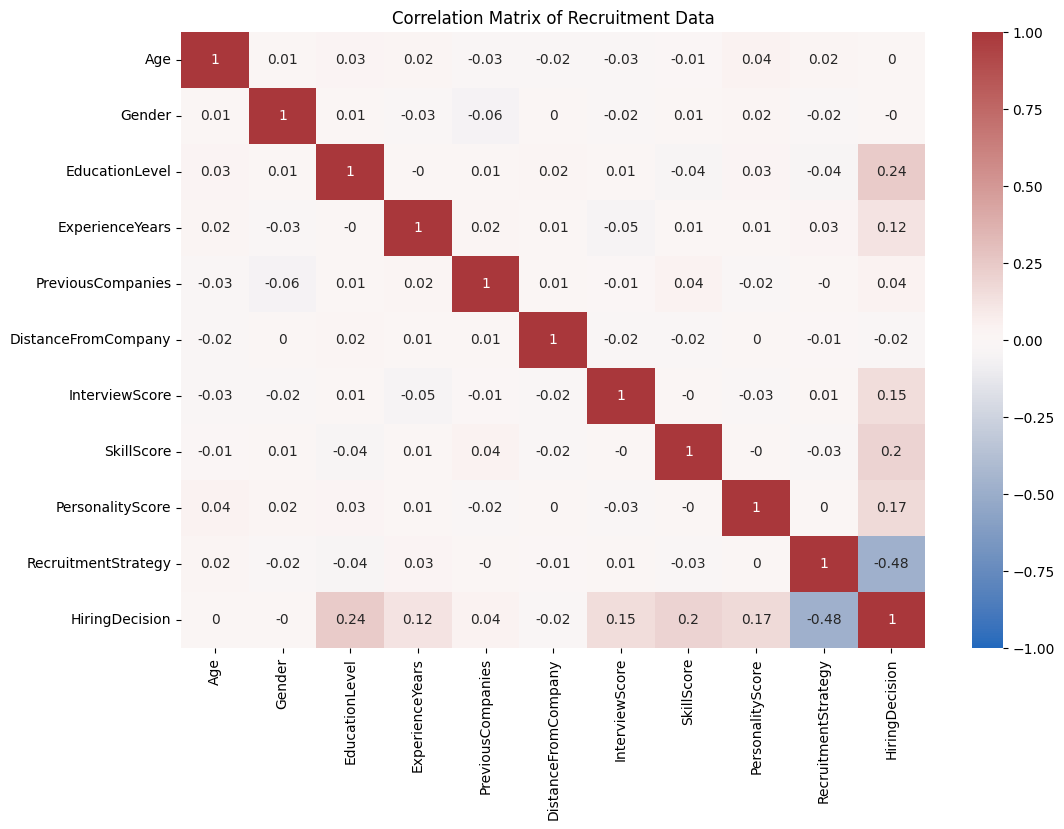

In [3]:
correlation_matrix = recruitment_data.corr().round(2)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Correlation Matrix of Recruitment Data')
plt.show()

Création de l'arbre de décision

Accuracy: 0.84
Precision: 0.70
Recall: 0.78
F1 Score: 0.74


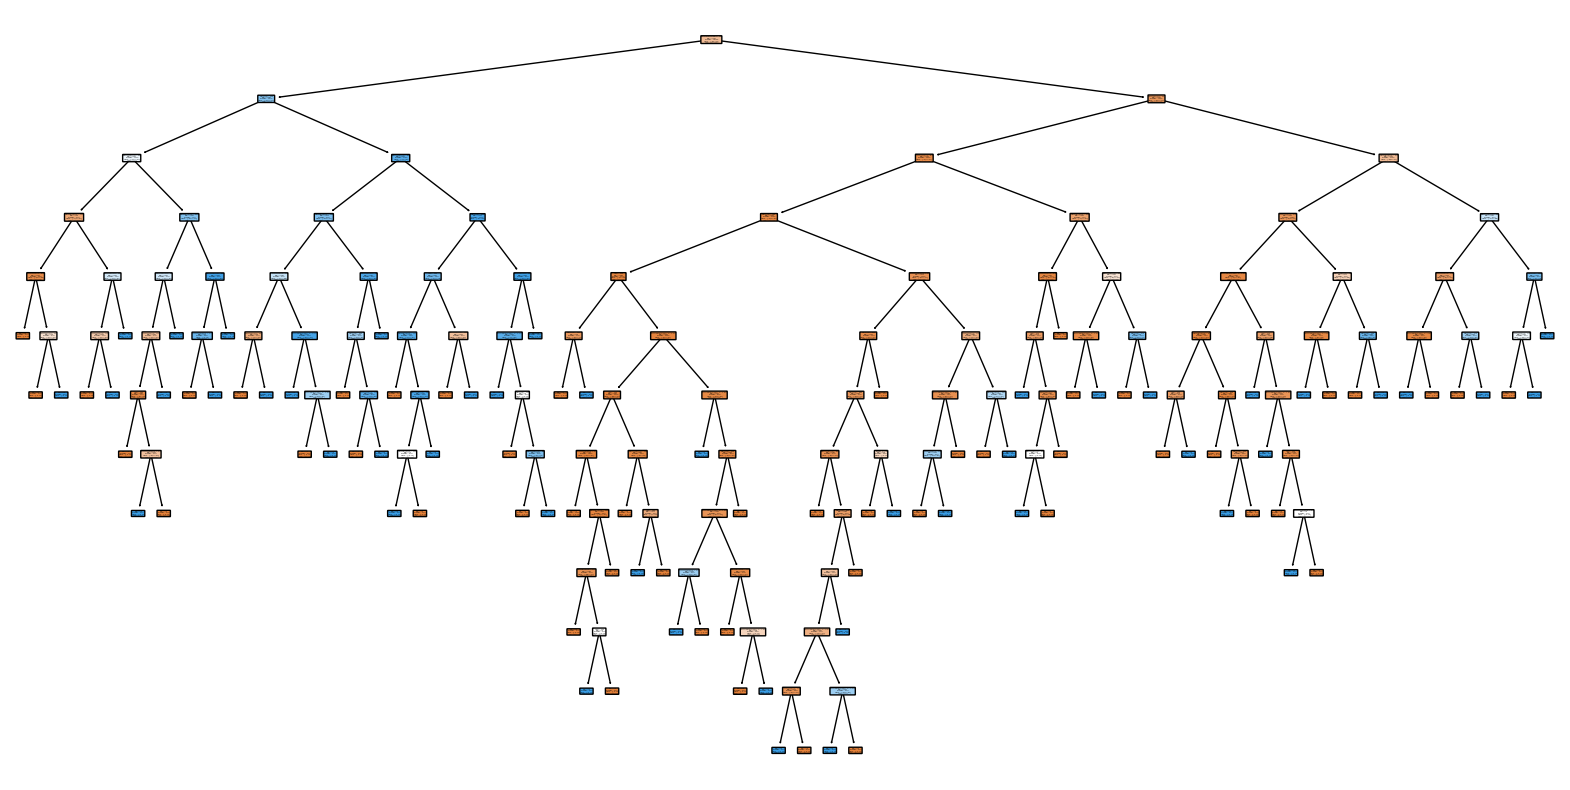

In [6]:


X = recruitment_data.drop(columns=['HiringDecision'])
y = recruitment_data['HiringDecision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Hired', 'Hired'], rounded=True, proportion=True)
plt.show()

Matrice de confusion

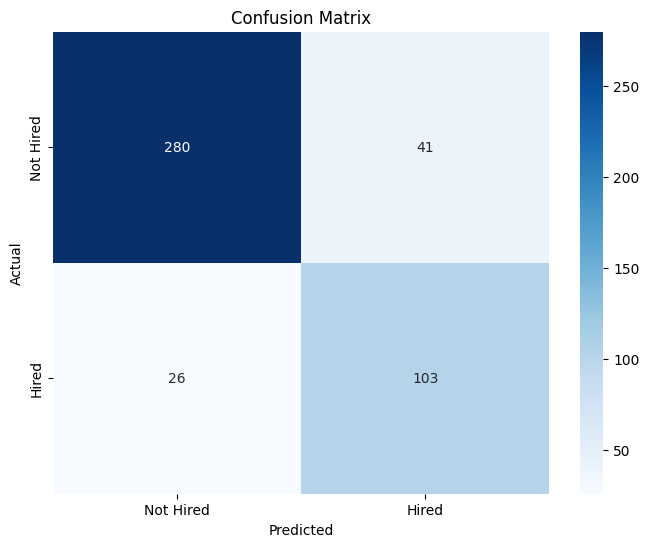

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Ici, nous faisons une Information importante : nous étudions les caractéristiques les plus impactantes pour le recrutement d'un collaborateur.

               Feature  Importance
9  RecruitmentStrategy    0.322724
6       InterviewScore    0.132593
3      ExperienceYears    0.125736
7           SkillScore    0.119119
8     PersonalityScore    0.109327
2       EducationLevel    0.093244
5  DistanceFromCompany    0.051038
0                  Age    0.026357
4    PreviousCompanies    0.014612
1               Gender    0.005252


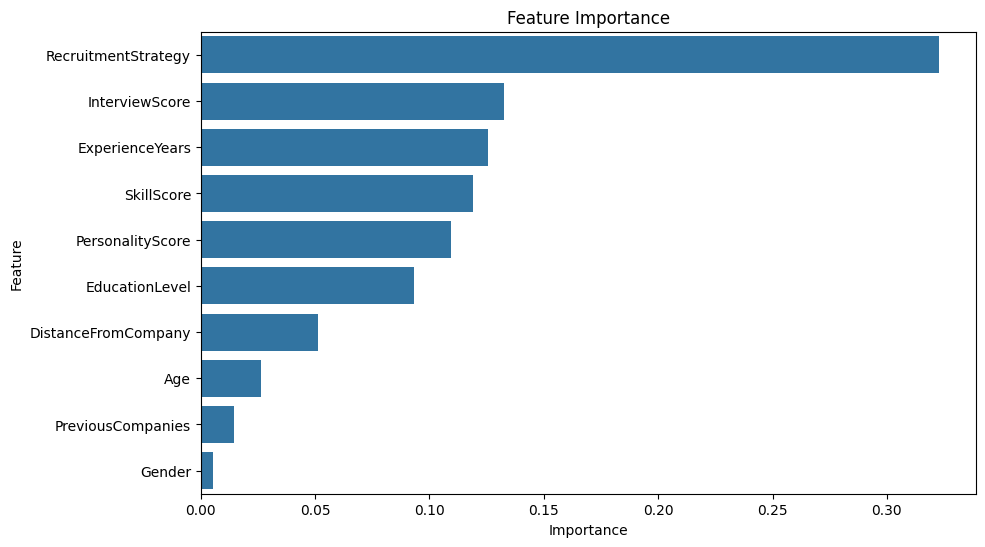

In [7]:
feature_importance = model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()

En concusion de ce graphique, nous pouvons en conclure que la stratégie de recrutement est la caractéristique impctante pour le recrutement d'un nouveau collaborateur dans l'entreprise pour le modèle DecisionTreeClassifier.

Ici, nous faisons une Information importante : nous étudions les caractéristiques les plus impactantes pour le recrutement d'un collaborateur.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.93
Precision: 0.93
Recall: 0.81
F1 Score: 0.86


               Feature  Importance
9  RecruitmentStrategy    0.308560
7           SkillScore    0.117882
6       InterviewScore    0.116596
8     PersonalityScore    0.111714
3      ExperienceYears    0.094380
2       EducationLevel    0.087103
5  DistanceFromCompany    0.067823
0                  Age    0.055331
4    PreviousCompanies    0.027871
1               Gender    0.012739


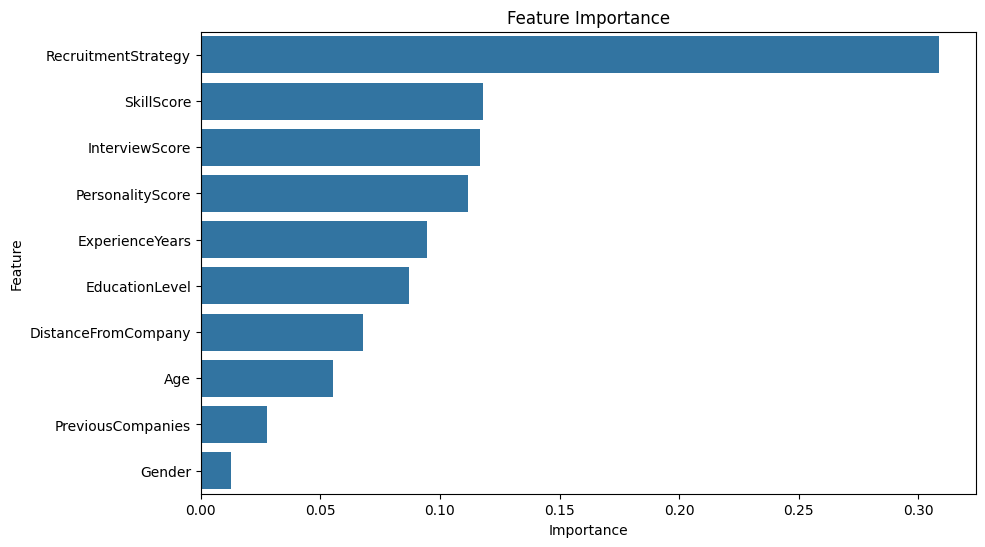

In [9]:
feature_importance = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()

En concusion de ce graphique, nous pouvons en conclure que la stratégie de recrutement est la caractéristique impctante pour le recrutement d'un nouveau collaborateur dans l'entreprise pour le modèle RandomForestClassifier.

In [10]:
recruitment_data = pd.read_csv("recruitment_data.csv")

In [11]:
recruitment_data = recruitment_data.drop(columns=[ 'RecruitmentStrategy'])


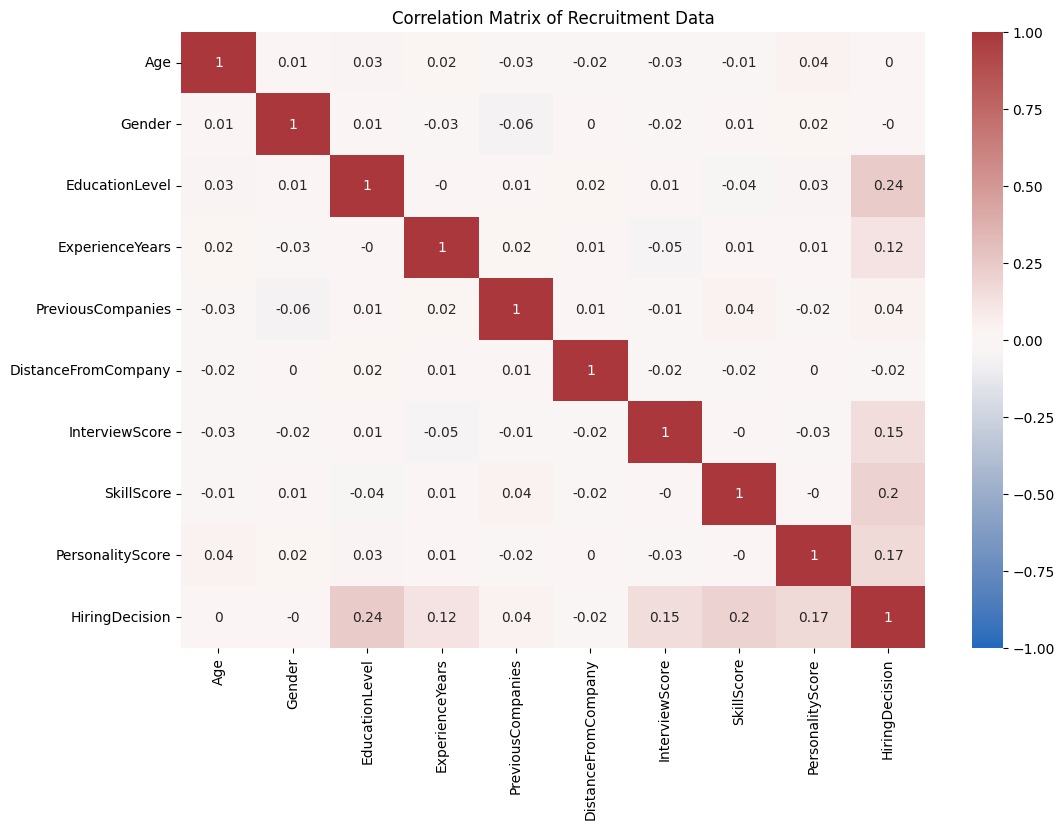

In [12]:
correlation_matrix = recruitment_data.corr().round(2)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Correlation Matrix of Recruitment Data')
plt.show()

Accuracy: 0.69
Precision: 0.46
Recall: 0.43
F1 Score: 0.45


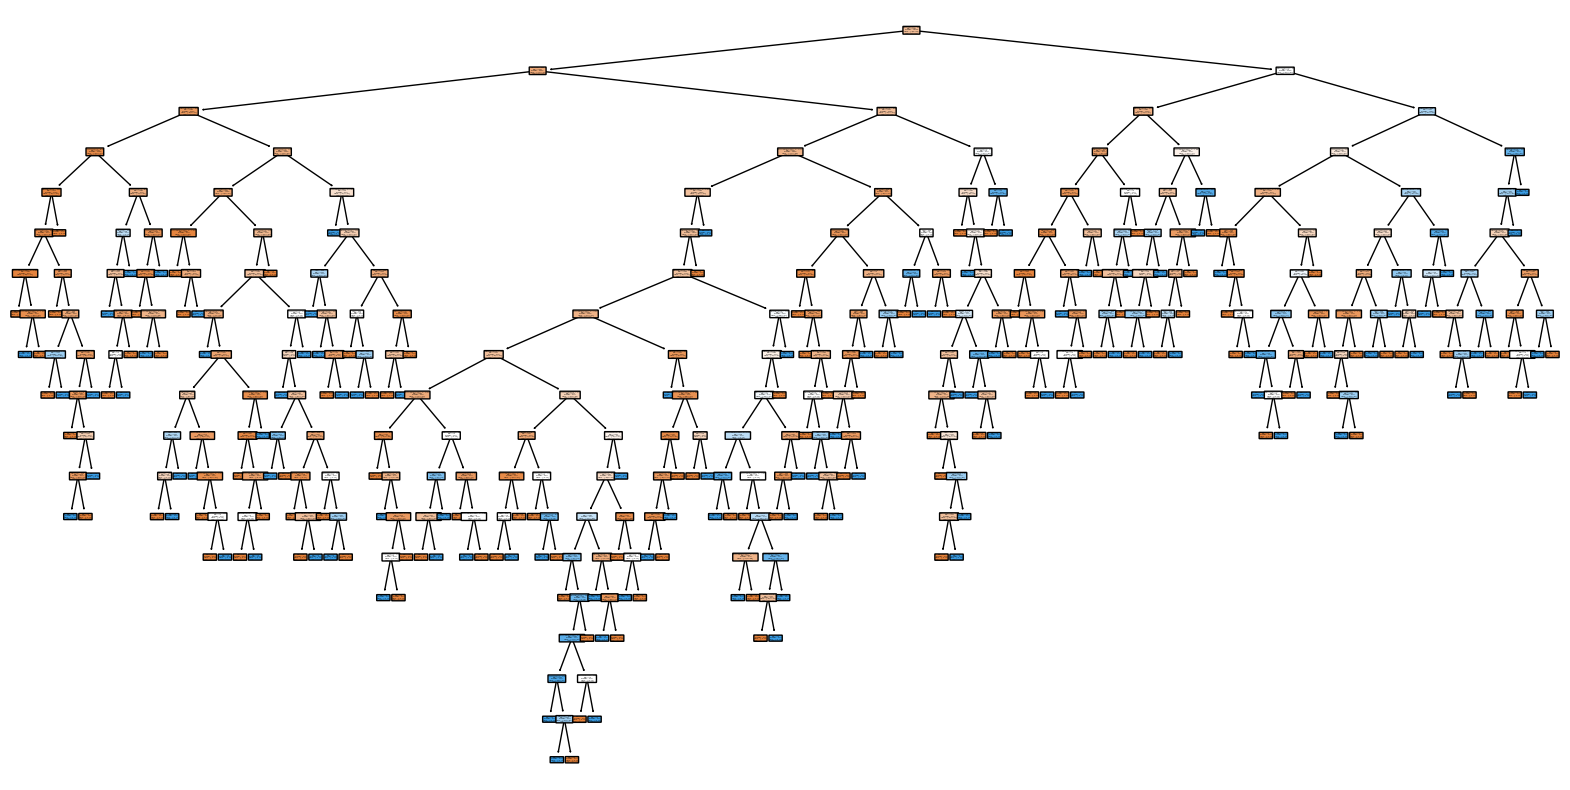

In [13]:
X = recruitment_data.drop(columns=['HiringDecision'])
y = recruitment_data['HiringDecision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Hired', 'Hired'], rounded=True, proportion=True)
plt.show()

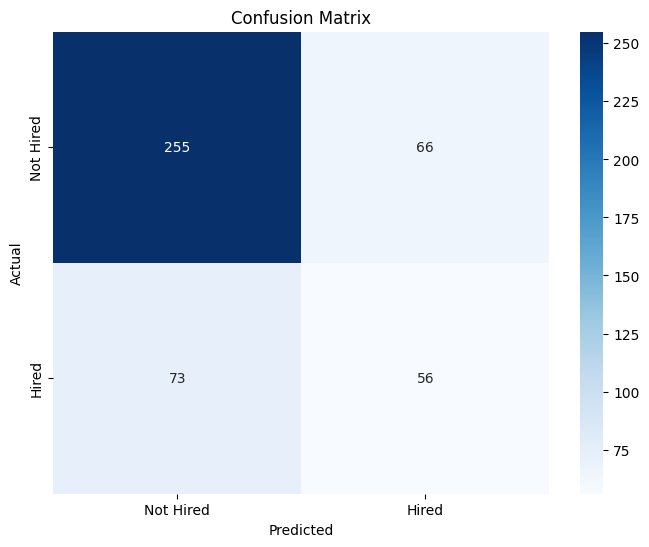

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

               Feature  Importance
6       InterviewScore    0.191704
8     PersonalityScore    0.161595
7           SkillScore    0.131003
5  DistanceFromCompany    0.125137
3      ExperienceYears    0.120103
0                  Age    0.099826
2       EducationLevel    0.087507
4    PreviousCompanies    0.052311
1               Gender    0.030813


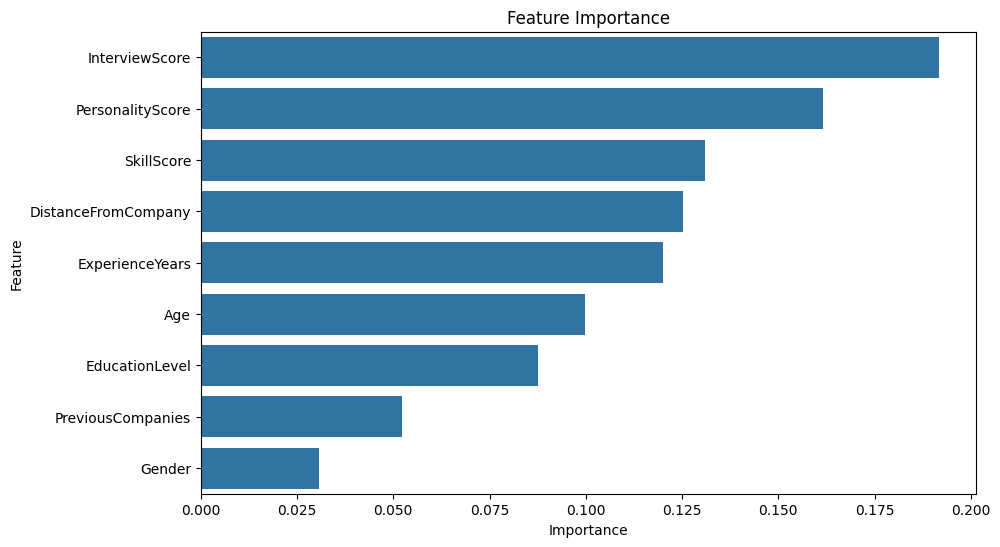

In [15]:
feature_importance = model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()

In [25]:
recruitment_data = pd.read_csv("recruitment_data.csv")
recruitment_data = recruitment_data.drop(columns=[ 'RecruitmentStrategy'])

X = recruitment_data.drop(columns=['HiringDecision'])
y = recruitment_data['HiringDecision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.76
Precision: 0.64
Recall: 0.34
F1 Score: 0.45


               Feature  Importance
8     PersonalityScore    0.165165
7           SkillScore    0.161605
6       InterviewScore    0.158794
5  DistanceFromCompany    0.127146
3      ExperienceYears    0.114215
0                  Age    0.101507
2       EducationLevel    0.095407
4    PreviousCompanies    0.053925
1               Gender    0.022236


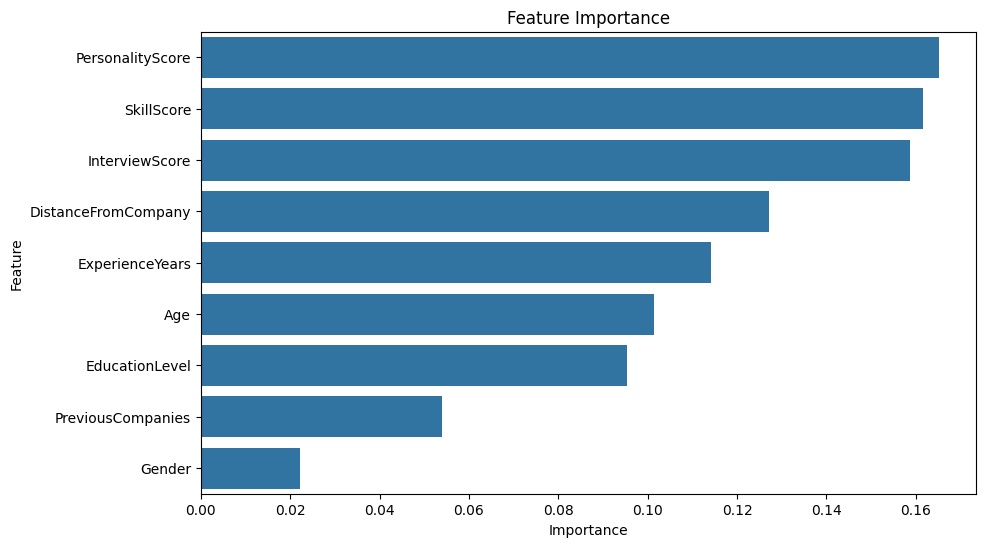

In [24]:
feature_importance = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()

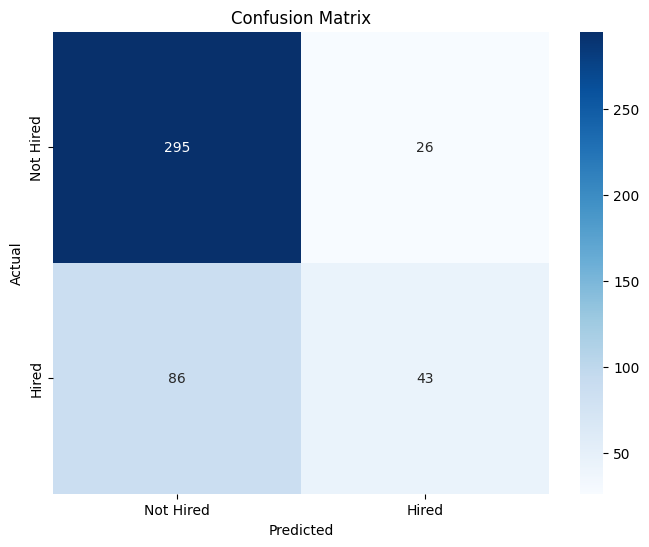

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()